# Exercise 6.1 Sourcing Open Data

## 1. Importing Libraries and Set the system path

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Define the path to the data files
path = r'C:\Users\Stony\OneDrive\CareerFoundry\Data Immersion Course\Achievement 6\Covid Analysis'

## 2. Import the dataset and initial validation

In [7]:
# Load the dataset on COVID-19 deaths and contributing conditions as "df_covid"
df_covid = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Conditions_Contributing_to_COVID-19_Deaths.csv'))

In [8]:
# Validate the dataset loaded properly
print(df_covid.head())
print(df_covid.info())
df_covid.shape

   Data As Of  Start Date    End Date     Group  Year  Month          State  \
0  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
1  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
2  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
3  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
4  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   

        Condition Group                Condition ICD10_codes Age Group  \
0  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
1  Respiratory diseases  Influenza and pneumonia     J09-J18     25-34   
2  Respiratory diseases  Influenza and pneumonia     J09-J18     35-44   
3  Respiratory diseases  Influenza and pneumonia     J09-J18     45-54   
4  Respiratory diseases  Influenza and pneumonia     J09-J18     55-64   

   COVID-19 Deaths  Number of Mentions Flag  
0           1569.0              16

(621000, 14)

## 3. Initial data exploration

In [10]:
# Validate the basic statistics of the dataframe
df_covid.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,608580.000000,558900.000000,4.375510e+05,4.434230e+05
mean,2021.408163,6.200000,1.201179e+02,1.293348e+02
std,1.086436,3.350625,2.980201e+03,3.203936e+03
min,2020.000000,1.000000,0.000000e+00,0.000000e+00
25%,2020.000000,3.000000,0.000000e+00,0.000000e+00
50%,2021.000000,6.000000,0.000000e+00,0.000000e+00
75%,2022.000000,9.000000,1.800000e+01,1.900000e+01
max,2023.000000,12.000000,1.146242e+06,1.146242e+06


As expected, data in the Year column ranges from 2020 through 2023 while data in the Month column ranges from January (1) through December (12)

There is a large amount of variability in Covid-19 Deaths and Number of Mentions with each column having large maximum numbers and a large number of zeroes as seen by the median value being (0).

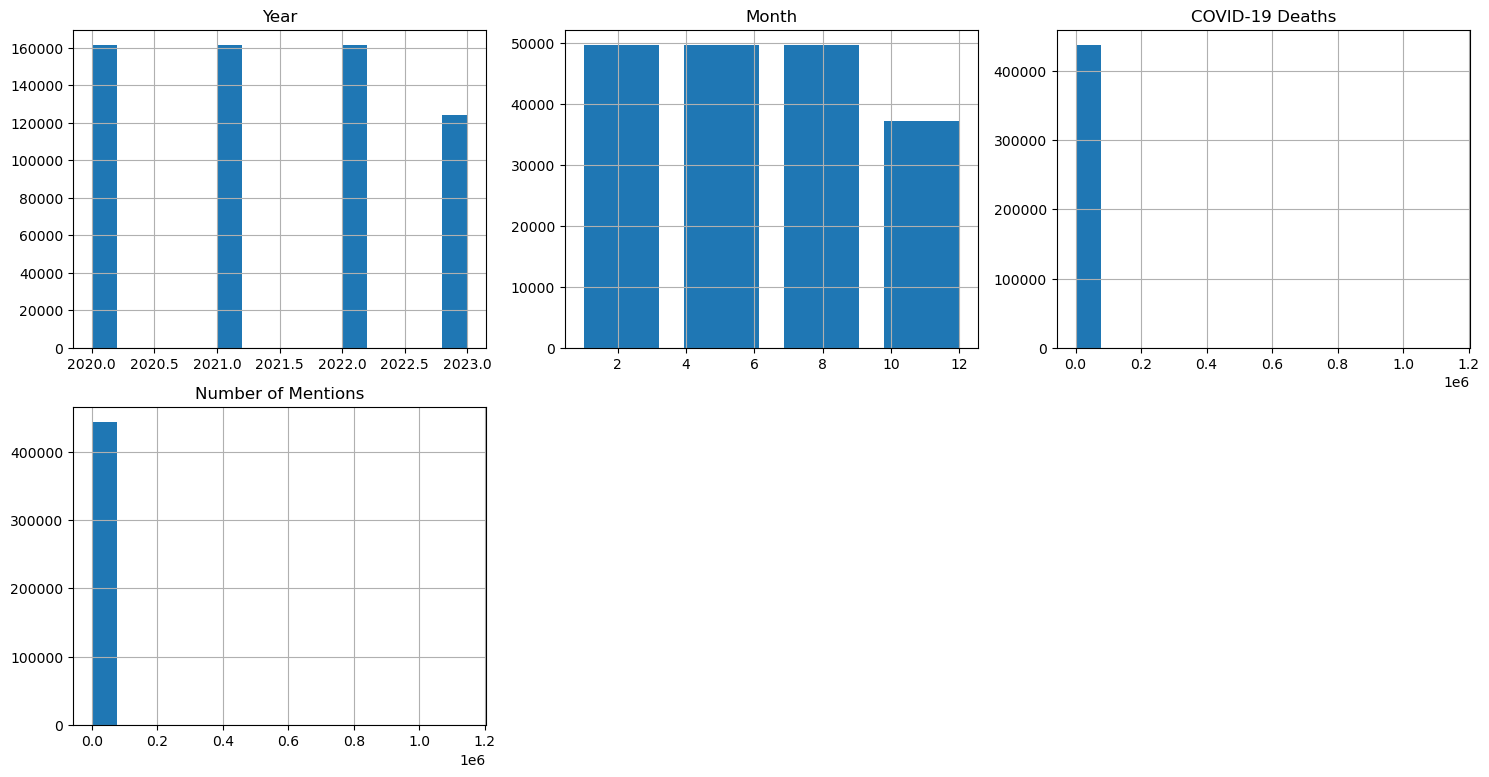

In [13]:
# Create histograms to visualize the data
df_covid.hist(bins=15, figsize=(15, 15), layout=(4, 3))
plt.tight_layout()
plt.show()

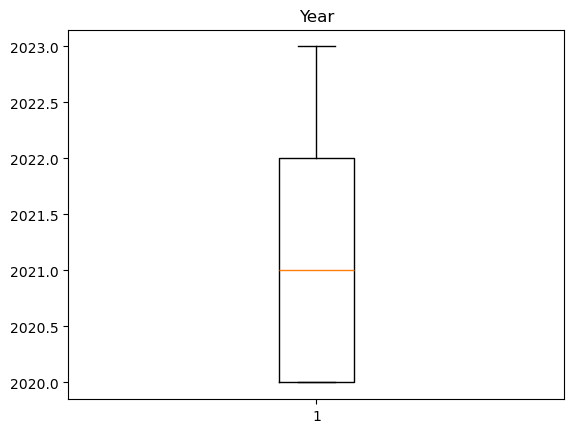

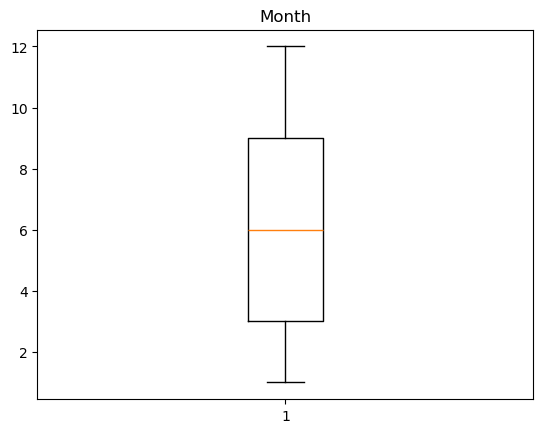

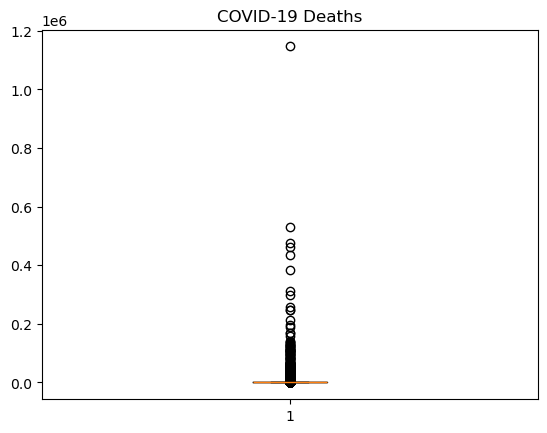

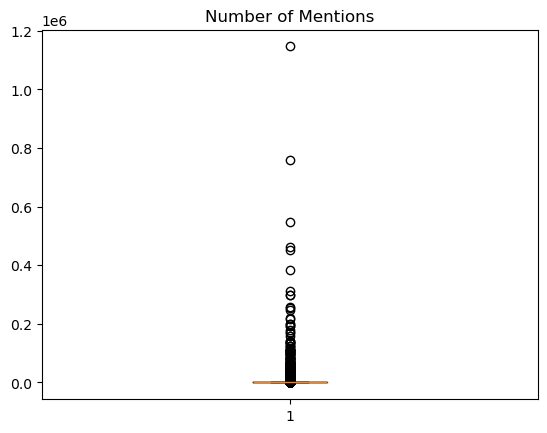

In [14]:
# Creating box plots for further visualization of the data:
plt.boxplot(df_covid['Year'].dropna())
plt.title('Year')
plt.show()

plt.boxplot(df_covid['Month'].dropna())
plt.title('Month')
plt.show()

plt.boxplot(df_covid['COVID-19 Deaths'].dropna())
plt.title('COVID-19 Deaths')
plt.show()

plt.boxplot(df_covid['Number of Mentions'].dropna())
plt.title('Number of Mentions')
plt.show()

Both Covid-19 deaths and Number of Mentions are highly right-skewed with large numbers of outliers. The rest of the data appears as expected.

In [16]:
# Frequency count for State column
print(df_covid['State'].value_counts(dropna=False))

State
United States           11500
Pennsylvania            11500
Nevada                  11500
New Hampshire           11500
New Jersey              11500
New Mexico              11500
New York                11500
New York City           11500
North Carolina          11500
North Dakota            11500
Ohio                    11500
Oklahoma                11500
Oregon                  11500
Rhode Island            11500
Alabama                 11500
South Carolina          11500
South Dakota            11500
Tennessee               11500
Texas                   11500
Utah                    11500
Vermont                 11500
Virginia                11500
Washington              11500
West Virginia           11500
Wisconsin               11500
Wyoming                 11500
Nebraska                11500
Montana                 11500
Missouri                11500
Mississippi             11500
Alaska                  11500
Arizona                 11500
Arkansas                11500
Cali

In [17]:
# Frequency count for Condition Group column
print(df_covid['Condition Group'].value_counts(dropna=False))

Condition Group
Circulatory diseases                                                         189000
Respiratory diseases                                                         162000
Sepsis                                                                        27000
Malignant neoplasms                                                           27000
Diabetes                                                                      27000
Obesity                                                                       27000
Alzheimer disease                                                             27000
Vascular and unspecified dementia                                             27000
Renal failure                                                                 27000
Intentional and unintentional injury, poisoning, and other adverse events     27000
All other conditions and causes (residual)                                    27000
COVID-19                                                    

In [18]:
# Frequency count for Condition column
print(df_covid['Condition'].value_counts(dropna=False))

Condition
Influenza and pneumonia                                                      27000
Other diseases of the circulatory system                                     27000
All other conditions and causes (residual)                                   27000
Intentional and unintentional injury, poisoning, and other adverse events    27000
Renal failure                                                                27000
Vascular and unspecified dementia                                            27000
Alzheimer disease                                                            27000
Obesity                                                                      27000
Diabetes                                                                     27000
Malignant neoplasms                                                          27000
Sepsis                                                                       27000
Cerebrovascular diseases                                                     

In [19]:
# Frequency count for ICD-10 Codes Group column
print(df_covid['ICD10_codes'].value_counts(dropna=False))

ICD10_codes
J09-J18                                                                                                                                                                                 27000
I00-I09, I26-I43, I51, I52, I70-I99                                                                                                                                                     27000
A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F00, F02, F04-G26, G31-H95, K00-K93, L00-M99, N00-N16, N20-N98, O00-O99, P00-P96, Q00-Q99, R00-R08, R09.0, R09.1, R09.3, R09.8, R10-R99    27000
S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y40-Y89, U01-U03                                                                                                                           27000
N17-N19                                                                                                                                                                                 27000
F01, F03                              

In [20]:
# Frequency count for Age Group column
print(df_covid['Age Group'].value_counts(dropna=False))

Age Group
0-24          62100
25-34         62100
35-44         62100
45-54         62100
55-64         62100
65-74         62100
75-84         62100
85+           62100
Not stated    62100
All Ages      62100
Name: count, dtype: int64


In [21]:
# Frequency count for Flag column
print(df_covid['Flag'].value_counts(dropna=False))

Flag
NaN                                                                                                                           437551
One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.    183449
Name: count, dtype: int64


It appears that the distribution of records is consistent between the states, conditions, condition groups, age groups, and ICD codes. The flag column contains mostly missing values, which will work for our analysis since that means there is a minimum amount of data being suppressed.

## 4. Check for missing values

In [24]:
# Check the dataset for missing values
df_covid.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                   12420
Month                  62100
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       183449
Number of Mentions    177577
Flag                  437551
dtype: int64

Examining the dataset in Excel, the rows with missing Year values are all part of the Group By Total, which would make sense since that Group is an aggregation of data. The missing values in the Month column are also due to the Group column grouping By Total or By Year which indicates again that the data is being aggregated in those groups.

The rows of aggregated data should be removed from the dataset as that will provide a more accurate descriptive statistics of our dataset and will address the missing values in the Month and Year columns

In [27]:
# Split the dataframe into 2, with 1 part containing the Broup By Month and the other containing the Group By Year and Group By Total
df_covid_month = df_covid[df_covid['Group'] == 'By Month']
df_covid_year_total = df_covid[df_covid['Group'].isin(['By Total', 'By Year'])]

In [28]:
# Validate the dataframe was seperated successfully
df_covid_month.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558900 entries, 62100 to 620999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          558900 non-null  object 
 1   Start Date          558900 non-null  object 
 2   End Date            558900 non-null  object 
 3   Group               558900 non-null  object 
 4   Year                558900 non-null  float64
 5   Month               558900 non-null  float64
 6   State               558900 non-null  object 
 7   Condition Group     558900 non-null  object 
 8   Condition           558900 non-null  object 
 9   ICD10_codes         558900 non-null  object 
 10  Age Group           558900 non-null  object 
 11  COVID-19 Deaths     388500 non-null  float64
 12  Number of Mentions  393720 non-null  float64
 13  Flag                170400 non-null  object 
dtypes: float64(4), object(10)
memory usage: 64.0+ MB


In [29]:
df_covid_year_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62100 entries, 0 to 62099
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data As Of          62100 non-null  object 
 1   Start Date          62100 non-null  object 
 2   End Date            62100 non-null  object 
 3   Group               62100 non-null  object 
 4   Year                49680 non-null  float64
 5   Month               0 non-null      float64
 6   State               62100 non-null  object 
 7   Condition Group     62100 non-null  object 
 8   Condition           62100 non-null  object 
 9   ICD10_codes         62100 non-null  object 
 10  Age Group           62100 non-null  object 
 11  COVID-19 Deaths     49051 non-null  float64
 12  Number of Mentions  49703 non-null  float64
 13  Flag                13049 non-null  object 
dtypes: float64(4), object(10)
memory usage: 7.1+ MB


In [30]:
# Validate number of rows in the original dataframeare present in the two
len(df_covid)

621000

In [31]:
# Validate all rows from the original dataframe are present in the two
len(df_covid_month) + len(df_covid_year_total)

621000

In [32]:
# Recheck the number of missing values in the split dataframe df_covid_month
df_covid_month.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                       0
Month                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       170400
Number of Mentions    165180
Flag                  388500
dtype: int64

The missing values in Covid-19 deaths and Number of Mentions all have an entry in the flag column with a flag value stating that one of more data cells have counts between 1 and 9 and have been suppressed according to NCHS confidentiality standards. It would make sense to imput a random number between 1 and 9 into those fields with the flag present.

In [34]:
# Define a function to create a random number between 1 and 9
def randomnum(series):
    return series.apply(lambda x: np.random.randint(1, 10) if pd.isnull(x) else x)

In [35]:
# Identify the rows with the flag suppressing the values
message = "One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards."
suppressed_rows = df_covid_month[df_covid_month['Flag'] == message]

In [36]:
# Impute the missing values in the Covid-19 deaths and Number of Mention columns
df_covid_month.loc[suppressed_rows.index, 'COVID-19 Deaths'] = randomnum(suppressed_rows['COVID-19 Deaths'])
df_covid_month.loc[suppressed_rows.index, 'Number of Mentions'] = randomnum(suppressed_rows['Number of Mentions'])

In [37]:
# Verify data was imputed successfully
df_covid_month.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,558900.000000,558900.000000,558900.000000,558900.000000
mean,2021.400000,6.200000,32.244133,35.055507
std,1.083206,3.350625,483.282273,518.791443
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2021.000000,6.000000,1.000000,1.000000
75%,2022.000000,9.000000,8.000000,8.000000
max,2023.000000,12.000000,105566.000000,105566.000000


In [38]:
# Verify value counts of Covid-19 Deaths
print(df_covid_month['COVID-19 Deaths'].value_counts().sort_index())

COVID-19 Deaths
0.0         275134
1.0          19391
2.0          18878
3.0          18947
4.0          19010
             ...  
63446.0          1
65477.0          1
83984.0          1
98080.0          1
105566.0         1
Name: count, Length: 2726, dtype: int64


In [39]:
# Verify value counts of Number of Mentions
print(df_covid_month['Number of Mentions'].value_counts().sort_index())

Number of Mentions
0.0         275134
1.0          18586
2.0          18400
3.0          18406
4.0          18552
             ...  
65364.0          1
65477.0          1
83984.0          1
98080.0          1
105566.0         1
Name: count, Length: 2875, dtype: int64


In [40]:
# Recheck for missing values in the dataframe
df_covid_month.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                       0
Month                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths            0
Number of Mentions         0
Flag                  388500
dtype: int64

There are no other missing values except in the Flag column, which is expected.

## 5. Duplicate and mixed-type checking

In [43]:
# Check for duplicate rows in the dataset
df_covid_month.duplicated().sum()

0

In [44]:
# Check for any mixed-type columns
for col in df_covid_month.columns.tolist():
    weird = (df_covid_month[[col]].map(type) != df_covid_month[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_covid_month[weird]) > 0:
        print (f"Mixed-type data found in column: {col}")
    else: print(f"No mixed-type data in column: {col}")

No mixed-type data in column: Data As Of
No mixed-type data in column: Start Date
No mixed-type data in column: End Date
No mixed-type data in column: Group
No mixed-type data in column: Year
No mixed-type data in column: Month
No mixed-type data in column: State
No mixed-type data in column: Condition Group
No mixed-type data in column: Condition
No mixed-type data in column: ICD10_codes
No mixed-type data in column: Age Group
No mixed-type data in column: COVID-19 Deaths
No mixed-type data in column: Number of Mentions
Mixed-type data found in column: Flag


## 6. Determining data types and transforming data

In [46]:
# Check the data-types of the dataframe
print(df_covid_month.dtypes)

Data As Of             object
Start Date             object
End Date               object
Group                  object
Year                  float64
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths       float64
Number of Mentions    float64
Flag                   object
dtype: object


In [47]:
# Convert date columns from object to datetime format
df_covid_month['Data As Of'] = pd.to_datetime(df_covid_month['Data As Of'])
df_covid_month['Start Date'] = pd.to_datetime(df_covid_month['Start Date'])
df_covid_month['End Date'] = pd.to_datetime(df_covid_month['End Date'])

C:\Users\Stony\AppData\Local\Temp\ipykernel_8276\2727874191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_month['Data As Of'] = pd.to_datetime(df_covid_month['Data As Of'])
C:\Users\Stony\AppData\Local\Temp\ipykernel_8276\2727874191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_month['Start Date'] = pd.to_datetime(df_covid_month['Start Date'])
C:\Users\Stony\AppData\Local\Temp\ipykernel_8276\2727874191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [48]:
# Convert State, Condition Group, COndition, ICD10_Codes, Age Group, and Flag columns to category format to improve memory efficiency
categorical_columns = ['State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group', 'Flag']
for column in categorical_columns:
    df_covid_month[column] = df_covid_month[column].astype('category')

C:\Users\Stony\AppData\Local\Temp\ipykernel_8276\2722304955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_month[column] = df_covid_month[column].astype('category')
C:\Users\Stony\AppData\Local\Temp\ipykernel_8276\2722304955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_month[column] = df_covid_month[column].astype('category')
C:\Users\Stony\AppData\Local\Temp\ipykernel_8276\2722304955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [49]:
# Recheck for mixed-type data
for col in df_covid_month.columns.tolist():
    weird = (df_covid_month[[col]].map(type) != df_covid_month[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_covid_month[weird]) > 0:
        print (f"Mixed-type data found in column: {col}")
    else: print(f"No mixed-type data in column: {col}")

No mixed-type data in column: Data As Of
No mixed-type data in column: Start Date
No mixed-type data in column: End Date
No mixed-type data in column: Group
No mixed-type data in column: Year
No mixed-type data in column: Month
No mixed-type data in column: State
No mixed-type data in column: Condition Group
No mixed-type data in column: Condition
No mixed-type data in column: ICD10_codes
No mixed-type data in column: Age Group
No mixed-type data in column: COVID-19 Deaths
No mixed-type data in column: Number of Mentions
Mixed-type data found in column: Flag


In [50]:
# Recheck the data-types
print(df_covid_month.dtypes)

Data As Of            datetime64[ns]
Start Date            datetime64[ns]
End Date              datetime64[ns]
Group                         object
Year                         float64
Month                        float64
State                       category
Condition Group             category
Condition                   category
ICD10_codes                 category
Age Group                   category
COVID-19 Deaths              float64
Number of Mentions           float64
Flag                        category
dtype: object


In [51]:
# Drop the Group column as it only contains "By Month" and is no longer necessary for sorting/filtering
df_covid_month = df_covid_month.drop(columns=['Group'])

In [52]:
# Verify the changes
print(df_covid_month.columns)

Index(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State',
       'Condition Group', 'Condition', 'ICD10_codes', 'Age Group',
       'COVID-19 Deaths', 'Number of Mentions', 'Flag'],
      dtype='object')


## 7. Cleaning Errors and Inconsistencies

In [93]:
# Verify unique values in the category columns
unique_covid = {col: df_covid_month[col].unique() for col in ['State']}
for col, values in unique_covid.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: State
Number of unique values: 54
Unique values:
  - United States
  - Alabama
  - Alaska
  - Arizona
  - Arkansas
  - California
  - Colorado
  - Connecticut
  - Delaware
  - District of Columbia
  - Florida
  - Georgia
  - Hawaii
  - Idaho
  - Illinois
  - Indiana
  - Iowa
  - Kansas
  - Kentucky
  - Louisiana
  - Maine
  - Maryland
  - Massachusetts
  - Michigan
  - Minnesota
  - Mississippi
  - Missouri
  - Montana
  - Nebraska
  - Nevada
  - New Hampshire
  - New Jersey
  - New Mexico
  - New York
  - New York City
  - North Carolina
  - North Dakota
  - Ohio
  - Oklahoma
  - Oregon
  - Pennsylvania
  - Rhode Island
  - South Carolina
  - South Dakota
  - Tennessee
  - Texas
  - Utah
  - Vermont
  - Virginia
  - Washington
  - West Virginia
  - Wisconsin
  - Wyoming
  - Puerto Rico


The State column has 54 unique values, which is different from the 50 we would expect. Looking at the unique values, we can see there are entries for United States, which appear to be aggregated data, New York City, Puerto Rico, and District of Columbia. United States and Puerto Rico will be removed from the dataframe to focus on the 50 states. New York City will be kept in the data because New York City data is excluded from New York State data. District of Columbia data will also be kept for now and will be revaluated later.

In [96]:
# Unique values for categorical columns
unique_covid = {col: df_covid_month[col].unique() for col in ['Condition Group']}
for col, values in unique_covid.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: Condition Group
Number of unique values: 12
Unique values:
  - Respiratory diseases
  - Circulatory diseases
  - Sepsis
  - Malignant neoplasms
  - Diabetes
  - Obesity
  - Alzheimer disease
  - Vascular and unspecified dementia
  - Renal failure
  - Intentional and unintentional injury, poisoning, and other adverse events
  - All other conditions and causes (residual)
  - COVID-19


In [98]:
# Unique values for categorical columns
unique_covid = {col: df_covid_month[col].unique() for col in ['Condition']}
for col, values in unique_covid.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: Condition
Number of unique values: 23
Unique values:
  - Influenza and pneumonia
  - Chronic lower respiratory diseases
  - Adult respiratory distress syndrome
  - Respiratory failure
  - Respiratory arrest
  - Other diseases of the respiratory system
  - Hypertensive diseases
  - Ischemic heart disease
  - Cardiac arrest
  - Cardiac arrhythmia
  - Heart failure
  - Cerebrovascular diseases
  - Other diseases of the circulatory system
  - Sepsis
  - Malignant neoplasms
  - Diabetes
  - Obesity
  - Alzheimer disease
  - Vascular and unspecified dementia
  - Renal failure
  - Intentional and unintentional injury, poisoning, and other adverse events
  - All other conditions and causes (residual)
  - COVID-19


In [100]:
# Unique values for categorical columns
unique_covid = {col: df_covid_month[col].unique() for col in ['ICD10_codes']}
for col, values in unique_covid.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: ICD10_codes
Number of unique values: 23
Unique values:
  - J09-J18
  - J40-J47
  - J80
  - J96
  - R09.2
  - J00-J06, J20-J39, J60-J70, J81-J86, J90-J95, J97-J99, U04
  - I10-I15
  - I20-I25
  - I46
  - I44, I45, I47-I49
  - I50
  - I60-I69
  - I00-I09, I26-I43, I51, I52, I70-I99
  - A40-A41
  - C00-C97
  - E10-E14
  - E65-E68
  - G30
  - F01, F03
  - N17-N19
  - S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y40-Y89, U01-U03
  - A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F00, F02, F04-G26, G31-H95, K00-K93, L00-M99, N00-N16, N20-N98, O00-O99, P00-P96, Q00-Q99, R00-R08, R09.0, R09.1, R09.3, R09.8, R10-R99
  - U071


In [102]:
# Unique values for categorical columns
unique_covid = {col: df_covid_month[col].unique() for col in ['Age Group']}
for col, values in unique_covid.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: Age Group
Number of unique values: 10
Unique values:
  - 0-24
  - 25-34
  - 35-44
  - 45-54
  - 55-64
  - 65-74
  - 75-84
  - 85+
  - Not stated
  - All Ages


Reviewing the unique values in Age Group, we see the All ages grouping which are aggregated rows and do not contribute anything to the analysis and should be removed. We also see a Not stated group and upon further investigation, all rows in that grouping have zero deaths and zero mentions and should also be removed from the dataframe since it does not contribute to the analysis in a meaningful way.

In [104]:
# Unique values for categorical columns
unique_covid = {col: df_covid_month[col].unique() for col in ['Flag']}
for col, values in unique_covid.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: Flag
Number of unique values: 2
Unique values:
  - nan
  - One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.


In [107]:
# Filter out rows where State is the United States or Puerto Rico
df_covid_states = df_covid_month[~df_covid_month['State'].isin(['United States', 'Puerto Rico'])]

In [109]:
# Remove rows where Age Group is "All Ages"
df_covid_cleaned = df_covid_states[df_covid_states['Age Group'] != 'All Ages']

In [111]:
# Remove rows where Age Group is "Not stated"
df_covid_final_cleaned = df_covid_cleaned[df_covid_cleaned['Age Group'] != 'Not stated']

In [119]:
# Recheck the unique values for the changed State column
unique_covid_cleaned = {col: df_covid_final_cleaned[col].unique() for col in ['State']}
for col, values in unique_covid_cleaned.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: State
Number of unique values: 52
Unique values:
  - Alabama
  - Alaska
  - Arizona
  - Arkansas
  - California
  - Colorado
  - Connecticut
  - Delaware
  - District of Columbia
  - Florida
  - Georgia
  - Hawaii
  - Idaho
  - Illinois
  - Indiana
  - Iowa
  - Kansas
  - Kentucky
  - Louisiana
  - Maine
  - Maryland
  - Massachusetts
  - Michigan
  - Minnesota
  - Mississippi
  - Missouri
  - Montana
  - Nebraska
  - Nevada
  - New Hampshire
  - New Jersey
  - New Mexico
  - New York
  - New York City
  - North Carolina
  - North Dakota
  - Ohio
  - Oklahoma
  - Oregon
  - Pennsylvania
  - Rhode Island
  - South Carolina
  - South Dakota
  - Tennessee
  - Texas
  - Utah
  - Vermont
  - Virginia
  - Washington
  - West Virginia
  - Wisconsin
  - Wyoming


In [121]:
# Recheck the unique values for the changed Age Group column
unique_covid_cleaned = {col: df_covid_final_cleaned[col].unique() for col in ['Age Group']}
for col, values in unique_covid_cleaned.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: Age Group
Number of unique values: 8
Unique values:
  - 0-24
  - 25-34
  - 35-44
  - 45-54
  - 55-64
  - 65-74
  - 75-84
  - 85+


## 8. Statistical checking for numerical columns

In [124]:
# Statistical summaries for numerical columns
df_covid_final_cleaned[['Year', 'Month', 'COVID-19 Deaths', 'Number of Mentions']].describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,430560.000000,430560.000000,430560.000000,430560.000000
mean,2021.400000,6.200000,10.914709,11.784485
std,1.083206,3.350626,53.958118,57.090120
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2021.000000,6.000000,1.000000,1.000000
75%,2022.000000,9.000000,7.000000,8.000000
max,2023.000000,12.000000,5094.000000,5094.000000


C:\Users\Stony\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


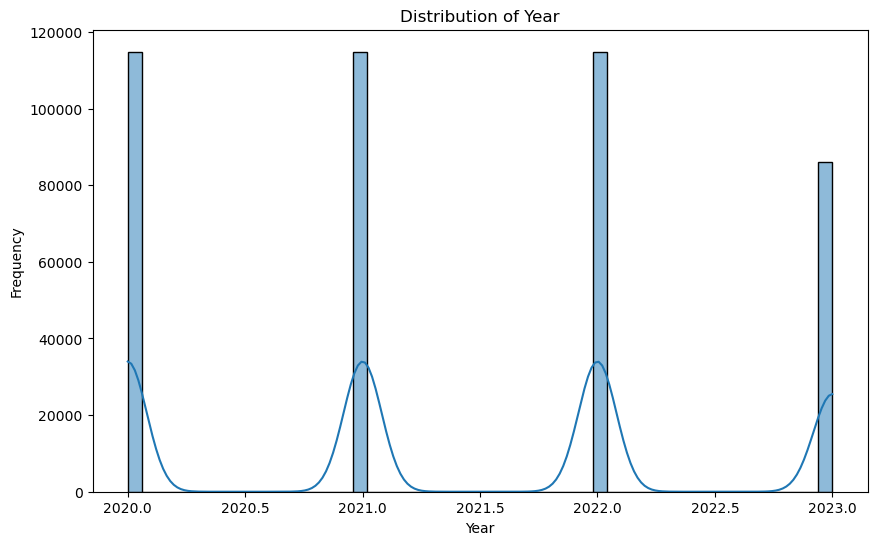

C:\Users\Stony\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


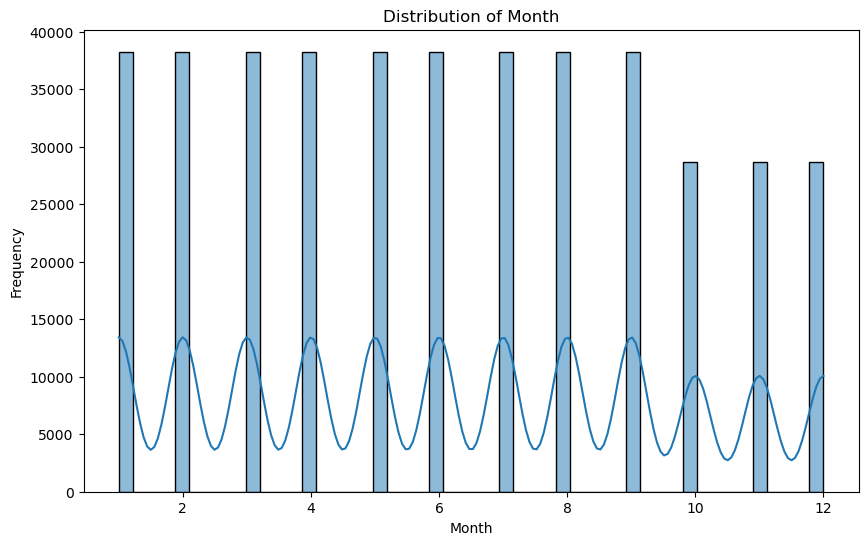

C:\Users\Stony\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


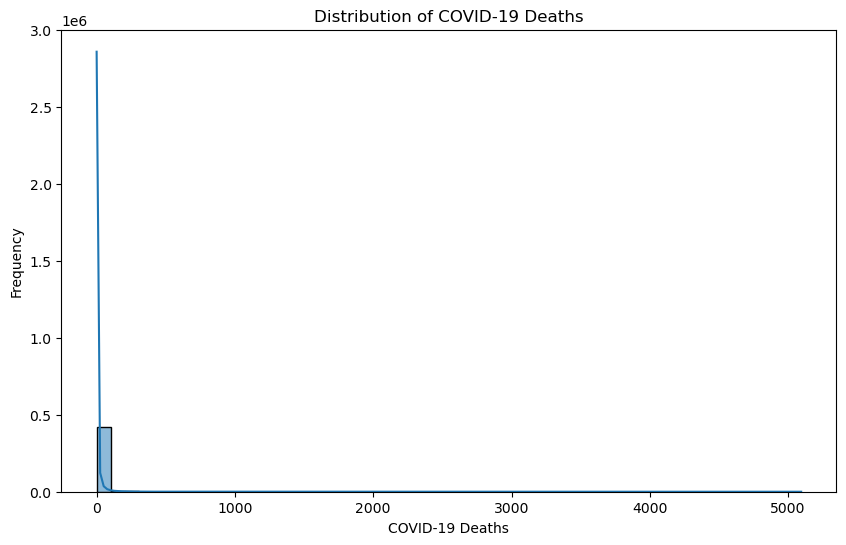

C:\Users\Stony\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


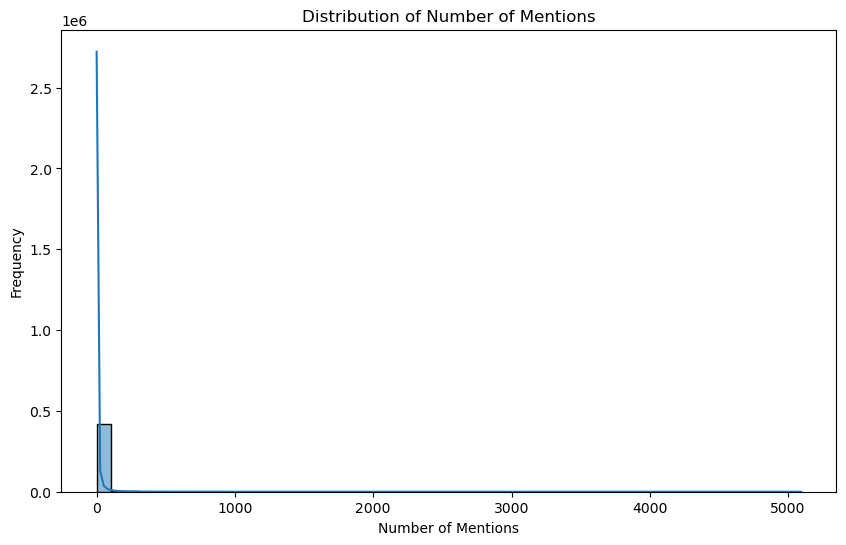

In [126]:
# Distribution plots for numerical columns
numerical_columns = ['Year', 'Month', 'COVID-19 Deaths', 'Number of Mentions']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_covid_final_cleaned[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Summary of Year and Month data show that there is data for 2020 through 2023 with every month being represented from January through December for years 2020, 2021, and 2022. The month data for 2023 ranges from January through September, when the data collection ended. 

Reviewing Covid-19 deaths and number of mentions show a relatively low mean value when compared to the maximum values. Both columns have large standard deviations, which is indicative of significant variability. The median value is one for both columns, representing that at least half of the entries are non-zero.

## 9. Checking for outliers

In [134]:
# Check for outliers using the IQR method by creating a function
def find_column_outliers_IQR(df, column):
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find indices of outliers
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    
    return df.loc[outlier_indices]

In [136]:
# Check for outliers in Year
year_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'Year')
year_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag


In [138]:
# Check for outliers in "Month"
month_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'Month')
month_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag


In [140]:
# Check for outliers in "COVID-19 Deaths"
covid_deaths_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'COVID-19 Deaths')
covid_deaths_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
72514,2023-09-24,2021-08-01,2021-08-31,2021.0,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,30.0,31.0,NaN
72552,2023-09-24,2021-01-01,2021-01-31,2021.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,18.0,18.0,NaN
72559,2023-09-24,2021-08-01,2021-08-31,2021.0,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,50.0,50.0,NaN
72560,2023-09-24,2021-09-01,2021-09-30,2021.0,9.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,53.0,56.0,NaN
72561,2023-09-24,2021-10-01,2021-10-31,2021.0,10.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,23.0,26.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610534,2023-09-24,2021-08-01,2021-08-31,2021.0,8.0,Wyoming,COVID-19,COVID-19,U071,85+,20.0,20.0,NaN
610535,2023-09-24,2021-09-01,2021-09-30,2021.0,9.0,Wyoming,COVID-19,COVID-19,U071,85+,32.0,32.0,NaN
610536,2023-09-24,2021-10-01,2021-10-31,2021.0,10.0,Wyoming,COVID-19,COVID-19,U071,85+,47.0,47.0,NaN
610537,2023-09-24,2021-11-01,2021-11-30,2021.0,11.0,Wyoming,COVID-19,COVID-19,U071,85+,28.0,28.0,NaN


In [142]:
# Check for outliers in "Number of Mentions"
mentions_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'Number of Mentions')
mentions_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
72514,2023-09-24,2021-08-01,2021-08-31,2021.0,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,30.0,31.0,NaN
72559,2023-09-24,2021-08-01,2021-08-31,2021.0,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,50.0,50.0,NaN
72560,2023-09-24,2021-09-01,2021-09-30,2021.0,9.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,53.0,56.0,NaN
72561,2023-09-24,2021-10-01,2021-10-31,2021.0,10.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,23.0,26.0,NaN
72596,2023-09-24,2020-12-01,2020-12-31,2020.0,12.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,29.0,29.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610527,2023-09-24,2021-01-01,2021-01-31,2021.0,1.0,Wyoming,COVID-19,COVID-19,U071,85+,33.0,33.0,NaN
610535,2023-09-24,2021-09-01,2021-09-30,2021.0,9.0,Wyoming,COVID-19,COVID-19,U071,85+,32.0,32.0,NaN
610536,2023-09-24,2021-10-01,2021-10-31,2021.0,10.0,Wyoming,COVID-19,COVID-19,U071,85+,47.0,47.0,NaN
610537,2023-09-24,2021-11-01,2021-11-30,2021.0,11.0,Wyoming,COVID-19,COVID-19,U071,85+,28.0,28.0,NaN


Both Covid deaths and number of mentions have a large amount of outliers, but this is most likely due to the large number of zero value records in the dataframe. The values for both columns appear reasonable and will be kept in the data.

## 10. Final validation of dataframe

In [146]:
# Final check of the df_covid_final_cleaned dataframe
print(df_covid_final_cleaned.head())
print(df_covid_final_cleaned.info())
df_covid_final_cleaned.shape

      Data As Of Start Date   End Date    Year  Month    State  \
72450 2023-09-24 2020-01-01 2020-01-31  2020.0    1.0  Alabama   
72451 2023-09-24 2020-02-01 2020-02-29  2020.0    2.0  Alabama   
72452 2023-09-24 2020-03-01 2020-03-31  2020.0    3.0  Alabama   
72453 2023-09-24 2020-04-01 2020-04-30  2020.0    4.0  Alabama   
72454 2023-09-24 2020-05-01 2020-05-31  2020.0    5.0  Alabama   

            Condition Group                Condition ICD10_codes Age Group  \
72450  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
72451  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
72452  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
72453  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
72454  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   

       COVID-19 Deaths  Number of Mentions Flag  
72450              0.0                 0.0  NaN  
72451              0.0            

(430560, 13)

In [148]:
# Final check of the statistics of the dataframe
df_covid_final_cleaned.describe()

,Data As Of,Start Date,End Date,Year,Month,COVID-19 Deaths,Number of Mentions
count,430560,430560,430560,430560.000000,430560.000000,430560.000000,430560.000000
mean,2023-09-24 00:00:00,2021-10-31 07:28:00.000001024,2021-11-29 13:52:00,2021.400000,6.200000,10.914709,11.784485
min,2023-09-24 00:00:00,2020-01-01 00:00:00,2020-01-31 00:00:00,2020.000000,1.000000,0.000000,0.000000
25%,2023-09-24 00:00:00,2020-12-01 00:00:00,2020-12-31 00:00:00,2020.000000,3.000000,0.000000,0.000000
50%,2023-09-24 00:00:00,2021-11-01 00:00:00,2021-11-30 00:00:00,2021.000000,6.000000,1.000000,1.000000
75%,2023-09-24 00:00:00,2022-10-01 00:00:00,2022-10-31 00:00:00,2022.000000,9.000000,7.000000,8.000000
max,2023-09-24 00:00:00,2023-09-01 00:00:00,2023-09-23 00:00:00,2023.000000,12.000000,5094.000000,5094.000000
std,NaN,NaN,NaN,1.083206,3.350626,53.958118,57.090120


In [150]:
# Final check of the counts of unique values
print(df_covid_final_cleaned['State'].value_counts(dropna=False))

State
Alabama                 8280
Montana                 8280
Nevada                  8280
New Hampshire           8280
New Jersey              8280
New Mexico              8280
New York                8280
New York City           8280
North Carolina          8280
North Dakota            8280
Ohio                    8280
Oklahoma                8280
Oregon                  8280
Pennsylvania            8280
Rhode Island            8280
South Carolina          8280
South Dakota            8280
Tennessee               8280
Texas                   8280
Utah                    8280
Vermont                 8280
Virginia                8280
Washington              8280
West Virginia           8280
Wisconsin               8280
Alaska                  8280
Nebraska                8280
Missouri                8280
Mississippi             8280
Arizona                 8280
Arkansas                8280
California              8280
Colorado                8280
Connecticut             8280
Delaware

In [154]:
print(df_covid_final_cleaned['Condition Group'].value_counts(dropna=False))

Condition Group
Circulatory diseases                                                         131040
Respiratory diseases                                                         112320
All other conditions and causes (residual)                                    18720
Alzheimer disease                                                             18720
COVID-19                                                                      18720
Diabetes                                                                      18720
Intentional and unintentional injury, poisoning, and other adverse events     18720
Malignant neoplasms                                                           18720
Obesity                                                                       18720
Renal failure                                                                 18720
Sepsis                                                                        18720
Vascular and unspecified dementia                           

In [158]:
print(df_covid_final_cleaned['Condition'].value_counts(dropna=False))

Condition
Adult respiratory distress syndrome                                          18720
Intentional and unintentional injury, poisoning, and other adverse events    18720
Sepsis                                                                       18720
Respiratory failure                                                          18720
Respiratory arrest                                                           18720
Renal failure                                                                18720
Other diseases of the respiratory system                                     18720
Other diseases of the circulatory system                                     18720
Obesity                                                                      18720
Malignant neoplasms                                                          18720
Ischemic heart disease                                                       18720
Influenza and pneumonia                                                      

In [160]:
print(df_covid_final_cleaned['ICD10_codes'].value_counts(dropna=False))

ICD10_codes
A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F00, F02, F04-G26, G31-H95, K00-K93, L00-M99, N00-N16, N20-N98, O00-O99, P00-P96, Q00-Q99, R00-R08, R09.0, R09.1, R09.3, R09.8, R10-R99    18720
I50                                                                                                                                                                                     18720
S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y40-Y89, U01-U03                                                                                                                           18720
R09.2                                                                                                                                                                                   18720
N17-N19                                                                                                                                                                                 18720
J96                                   

In [162]:
print(df_covid_final_cleaned['Age Group'].value_counts(dropna=False))

Age Group
0-24          53820
25-34         53820
35-44         53820
45-54         53820
55-64         53820
65-74         53820
75-84         53820
85+           53820
All Ages          0
Not stated        0
Name: count, dtype: int64


In [164]:
print(df_covid_final_cleaned['Flag'].value_counts(dropna=False))

Flag
NaN                                                                                                                           279731
One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.    150829
Name: count, dtype: int64


In [166]:
# Export the "df_covid_final_cleaned" dataframe to CSV
df_covid_final_cleaned.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths.csv'), index=False)